In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
df_total = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_total.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_total due to lack of information
df_total = df_total[~(df_total["PATIENT_NO"].isin([172, 173, 174]))]

df_train = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_test.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_test due to lack of information
df_test = df_test[~(df_test["PATIENT_NO"].isin([172, 173, 174]))]

In [4]:
df_total.info()
df_total.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 202
Data columns (total 18 columns):
PATIENT_NO            200 non-null int64
AGE                   200 non-null float64
SEX                   200 non-null int64
ORIGIN_EUROPE         200 non-null int64
ORIGIN_CHINA          200 non-null int64
ORIGIN_US             200 non-null int64
ORIGIN_ASEAN          200 non-null int64
ORIGIN_DOMESTIC       200 non-null int64
DAYS_OF_ONSET         200 non-null int64
ONSET_FEVER           200 non-null int64
ONSET_COUGH           200 non-null int64
ONSET_TIRED           200 non-null int64
ONSET_SORETHROAT      200 non-null int64
ONSET_RESPIRATORY     200 non-null int64
BACKGROUND_DISEASE    200 non-null int64
HOSPITAL              200 non-null int64
RISK_SCORE            200 non-null int64
LOS                   56 non-null float64
dtypes: float64(2), int64(16)
memory usage: 29.7 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE,LOS
198,199,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
199,200,61.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
200,201,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
201,202,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
202,203,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,NaN


In [5]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 18 columns):
PATIENT_NO            56 non-null int64
AGE                   56 non-null float64
SEX                   56 non-null int64
ORIGIN_EUROPE         56 non-null int64
ORIGIN_CHINA          56 non-null int64
ORIGIN_US             56 non-null int64
ORIGIN_ASEAN          56 non-null int64
ORIGIN_DOMESTIC       56 non-null int64
DAYS_OF_ONSET         56 non-null int64
ONSET_FEVER           56 non-null int64
ONSET_COUGH           56 non-null int64
ONSET_TIRED           56 non-null int64
ONSET_SORETHROAT      56 non-null int64
ONSET_RESPIRATORY     56 non-null int64
BACKGROUND_DISEASE    56 non-null int64
HOSPITAL              56 non-null int64
RISK_SCORE            56 non-null int64
LOS                   56 non-null int64
dtypes: float64(1), int64(17)
memory usage: 8.0 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE,LOS
0,1,66.0,1,0,1,0,0,0,6,0,0,0,0,0,2,1,8,21
1,2,28.0,1,0,1,0,0,0,3,0,0,0,0,0,0,1,8,13
2,3,25.0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,8,5
3,4,29.0,1,0,1,0,0,0,9,0,0,0,0,0,0,0,8,20
4,5,23.0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,8,12


In [6]:
df_test.info()
df_test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 146
Data columns (total 18 columns):
PATIENT_NO            144 non-null int64
AGE                   144 non-null float64
SEX                   144 non-null int64
ORIGIN_EUROPE         144 non-null int64
ORIGIN_CHINA          144 non-null int64
ORIGIN_US             144 non-null int64
ORIGIN_ASEAN          144 non-null int64
ORIGIN_DOMESTIC       144 non-null int64
DAYS_OF_ONSET         144 non-null int64
ONSET_FEVER           144 non-null int64
ONSET_COUGH           144 non-null int64
ONSET_TIRED           144 non-null int64
ONSET_SORETHROAT      144 non-null int64
ONSET_RESPIRATORY     144 non-null int64
BACKGROUND_DISEASE    144 non-null int64
HOSPITAL              144 non-null int64
RISK_SCORE            144 non-null int64
LOS                   0 non-null float64
dtypes: float64(2), int64(16)
memory usage: 21.4 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE,LOS
142,199,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
143,200,61.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
144,201,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
145,202,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
146,203,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,NaN


In [7]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [8]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [9]:
X_train.describe()


,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,34.200893,0.464286,0.535714,0.160714,0.071429,0.0,0.214286,2.214286,0.178571,0.142857,0.053571,0.035714,0.035714,0.071429,0.107143,4.428571
std,15.989657,0.503236,0.503236,0.370591,0.259870,0.0,0.414039,2.852204,0.386459,0.353094,0.227208,0.187256,0.187256,0.322329,0.312094,1.915080
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,29.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,44.250000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.000000


In [10]:
X_test.describe()

,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE
count,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,36.111111,0.444444,0.472222,0.0,0.041667,0.083333,0.381944,0.868056,0.180556,0.131944,0.013889,0.069444,0.034722,0.034722,0.298611,3.770833
std,16.381002,0.498638,0.500970,0.0,0.200524,0.277350,0.487559,1.986833,0.385992,0.339612,0.117438,0.255096,0.183714,0.183714,0.459246,1.876311
min,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,33.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,49.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
max,88.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [11]:
linear_models = [KNeighborsRegressor(),
                SVR()]

results = [PATIENT_NO_test]

for model in linear_models:
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

KNeighborsRegressor finished.
SVR finished.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_KNeighborsRegressor",
                                        2 : "LOS_SVRegression"})

df_results

,PATIENT_NO,LOS_KNeighborsRegressor,LOS_SVRegression
0,19.0,16.8,16.376498
1,20.0,21.0,17.287560
2,25.0,21.2,16.515937
3,26.0,21.4,17.661238
4,28.0,21.2,17.416528
5,30.0,21.4,17.612423
6,31.0,16.2,16.224221
7,32.0,18.2,16.149279
8,34.0,16.2,16.482749
9,36.0,18.2,16.127471


In [13]:
df_results.to_csv(r'./SVR+KNR_models_untuned.csv', index = False)

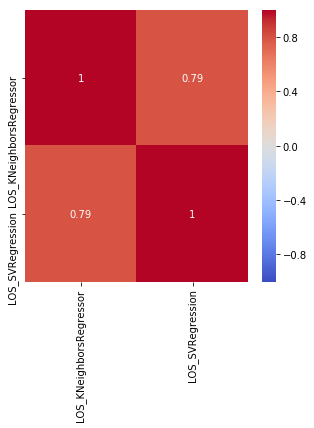

In [14]:
corr_matrix_untuned_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_untuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_untuned_results(SVR+KNR).png', bbox_inches = 'tight')

## Parameter tuning for K Neighbors Regressor

In [15]:
KNeighborsRegressor().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [16]:
tuned_parameters_KNR = [{
    'n_neighbors' : [4]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_KNR = KNeighborsRegressor()
grid_KNR = GridSearchCV(reg_model_KNR, tuned_parameters_KNR)
grid_KNR.fit(X_train, y_train)
reg_model_KNR_optimized = grid_KNR.best_estimator_

# summarize the results of the grid search
print(grid_KNR.best_score_)
print(grid_KNR.best_estimator_)

-1.2255364816909997
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
y_test_preds_KNR = reg_model_KNR_optimized.predict(X_test)

df_results['LOS_KNeighborsRegressor'] = y_test_preds_KNR

## Parameter tuning for Support Vector Regressor

In [18]:
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [19]:
tuned_parameters_SVR = [{
    'kernel': ['rbf'],
    'gamma' : [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000],
    'epsilon': [1e-4, 1e-3, 0.01, 0.1]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_SVR = SVR()
grid_SVR = GridSearchCV(reg_model_SVR, tuned_parameters_SVR, cv = 5)
grid_SVR.fit(X_train, y_train)
reg_model_SVR_optimized = grid_SVR.best_estimator_

# summarize the results of the grid search
print(grid_SVR.best_score_)
print(grid_SVR.best_estimator_)

-0.7952768881923554
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
y_test_preds_SVR = reg_model_SVR_optimized.predict(X_test)

df_results['LOS_SVRegression'] = y_test_preds_SVR

In [22]:
df_results

,PATIENT_NO,LOS_KNeighborsRegressor,LOS_SVRegression
0,19.0,17.00,15.451771
1,20.0,20.75,17.689365
2,25.0,21.00,18.185989
3,26.0,21.50,17.846719
4,28.0,21.00,17.949692
5,30.0,21.50,17.794708
6,31.0,15.75,16.813596
7,32.0,16.25,15.258046
8,34.0,17.25,16.933866
9,36.0,18.50,16.058122


In [23]:
df_results.to_csv(r'./SVR+KNR_models_tuned.csv', index = False)

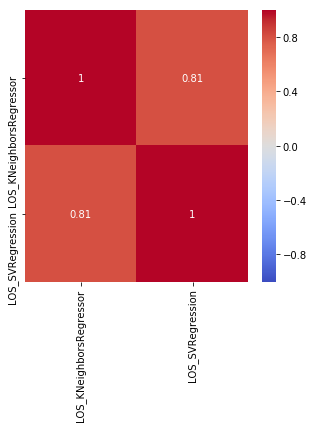

In [24]:
corr_matrix_tuned_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_tuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_tuned_results(SVR+KNR).png', bbox_inches = 'tight')